#### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset and subset columns

In [2]:
houseprice_data = pd.read_csv("data/HousingPricesData.csv")

In [3]:
houseprice_data = houseprice_data[['Price', 'Area', 'Room']]

#### Inspect first 5 rows and data types of the dataset

In [4]:
houseprice_data.head()

,Price,Area,Room
0,685000.0,64,3
1,475000.0,60,3
2,850000.0,109,4
3,580000.0,128,6
4,720000.0,138,5


In [5]:
houseprice_data.shape

(924, 3)

#### Calculate the Interquartile Range (IQR)

In [6]:
Q1 = houseprice_data['Price'].quantile(0.25)
Q3 = houseprice_data['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

350000.0


#### Identify Replacements using quantiles

In [7]:
low_replace = houseprice_data['Price'].quantile(0.05)
high_replace = houseprice_data['Price'].quantile(0.95)
median_replace = houseprice_data['Price'].quantile(0.5)
print(low_replace,high_replace,median_replace)

250000.0 1450000.0 467000.0


#### Replace Outliers using quantile values

In [8]:
houseprice_data['Adjusted_Price'] = houseprice_data.loc[:,'Price']
houseprice_data.loc[houseprice_data['Price'] < (Q1 - 1.5 * IQR) ,'Adjusted_Price'] = low_replace
houseprice_data.loc[houseprice_data['Price'] > (Q3 + 1.5 * IQR), 'Adjusted_Price'] = high_replace

#### Identify Outliers and replace with NaN in preparation for interpolation

In [9]:
outliers = houseprice_data['Price'][(houseprice_data['Price'] < (Q1 - 1.5 * IQR)) |(houseprice_data['Price'] > (Q3 + 1.5 * IQR))]

In [10]:
houseprice_replaced_data = houseprice_data.copy()
houseprice_replaced_data.loc[:,'Price_with_nan'] = houseprice_replaced_data.loc[:,'Price'] 
houseprice_replaced_data.loc[outliers.index,'Price_with_nan'] = np.nan

In [11]:
houseprice_replaced_data.isnull().sum()

Price              4
Area               0
Room               0
Adjusted_Price     4
Price_with_nan    75
dtype: int64

#### Use the interpolate function to replace outliers

In [12]:
houseprice_replaced_data = houseprice_replaced_data.interpolate(method='linear')

In [13]:
houseprice_replaced_data.isnull().sum()

Price             0
Area              0
Room              0
Adjusted_Price    0
Price_with_nan    0
dtype: int64

In [14]:
houseprice_replaced_data.loc[outliers.index,:].head()

,Price,Area,Room,Adjusted_Price,Price_with_nan
20,1625000.0,199,6,1450000.0,475000.0
28,1650000.0,235,7,1450000.0,350000.0
31,1950000.0,258,4,1450000.0,767500.0
33,3925000.0,319,7,1450000.0,605000.0
57,1295000.0,145,5,1450000.0,480000.0


#### Visualise Dataset

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

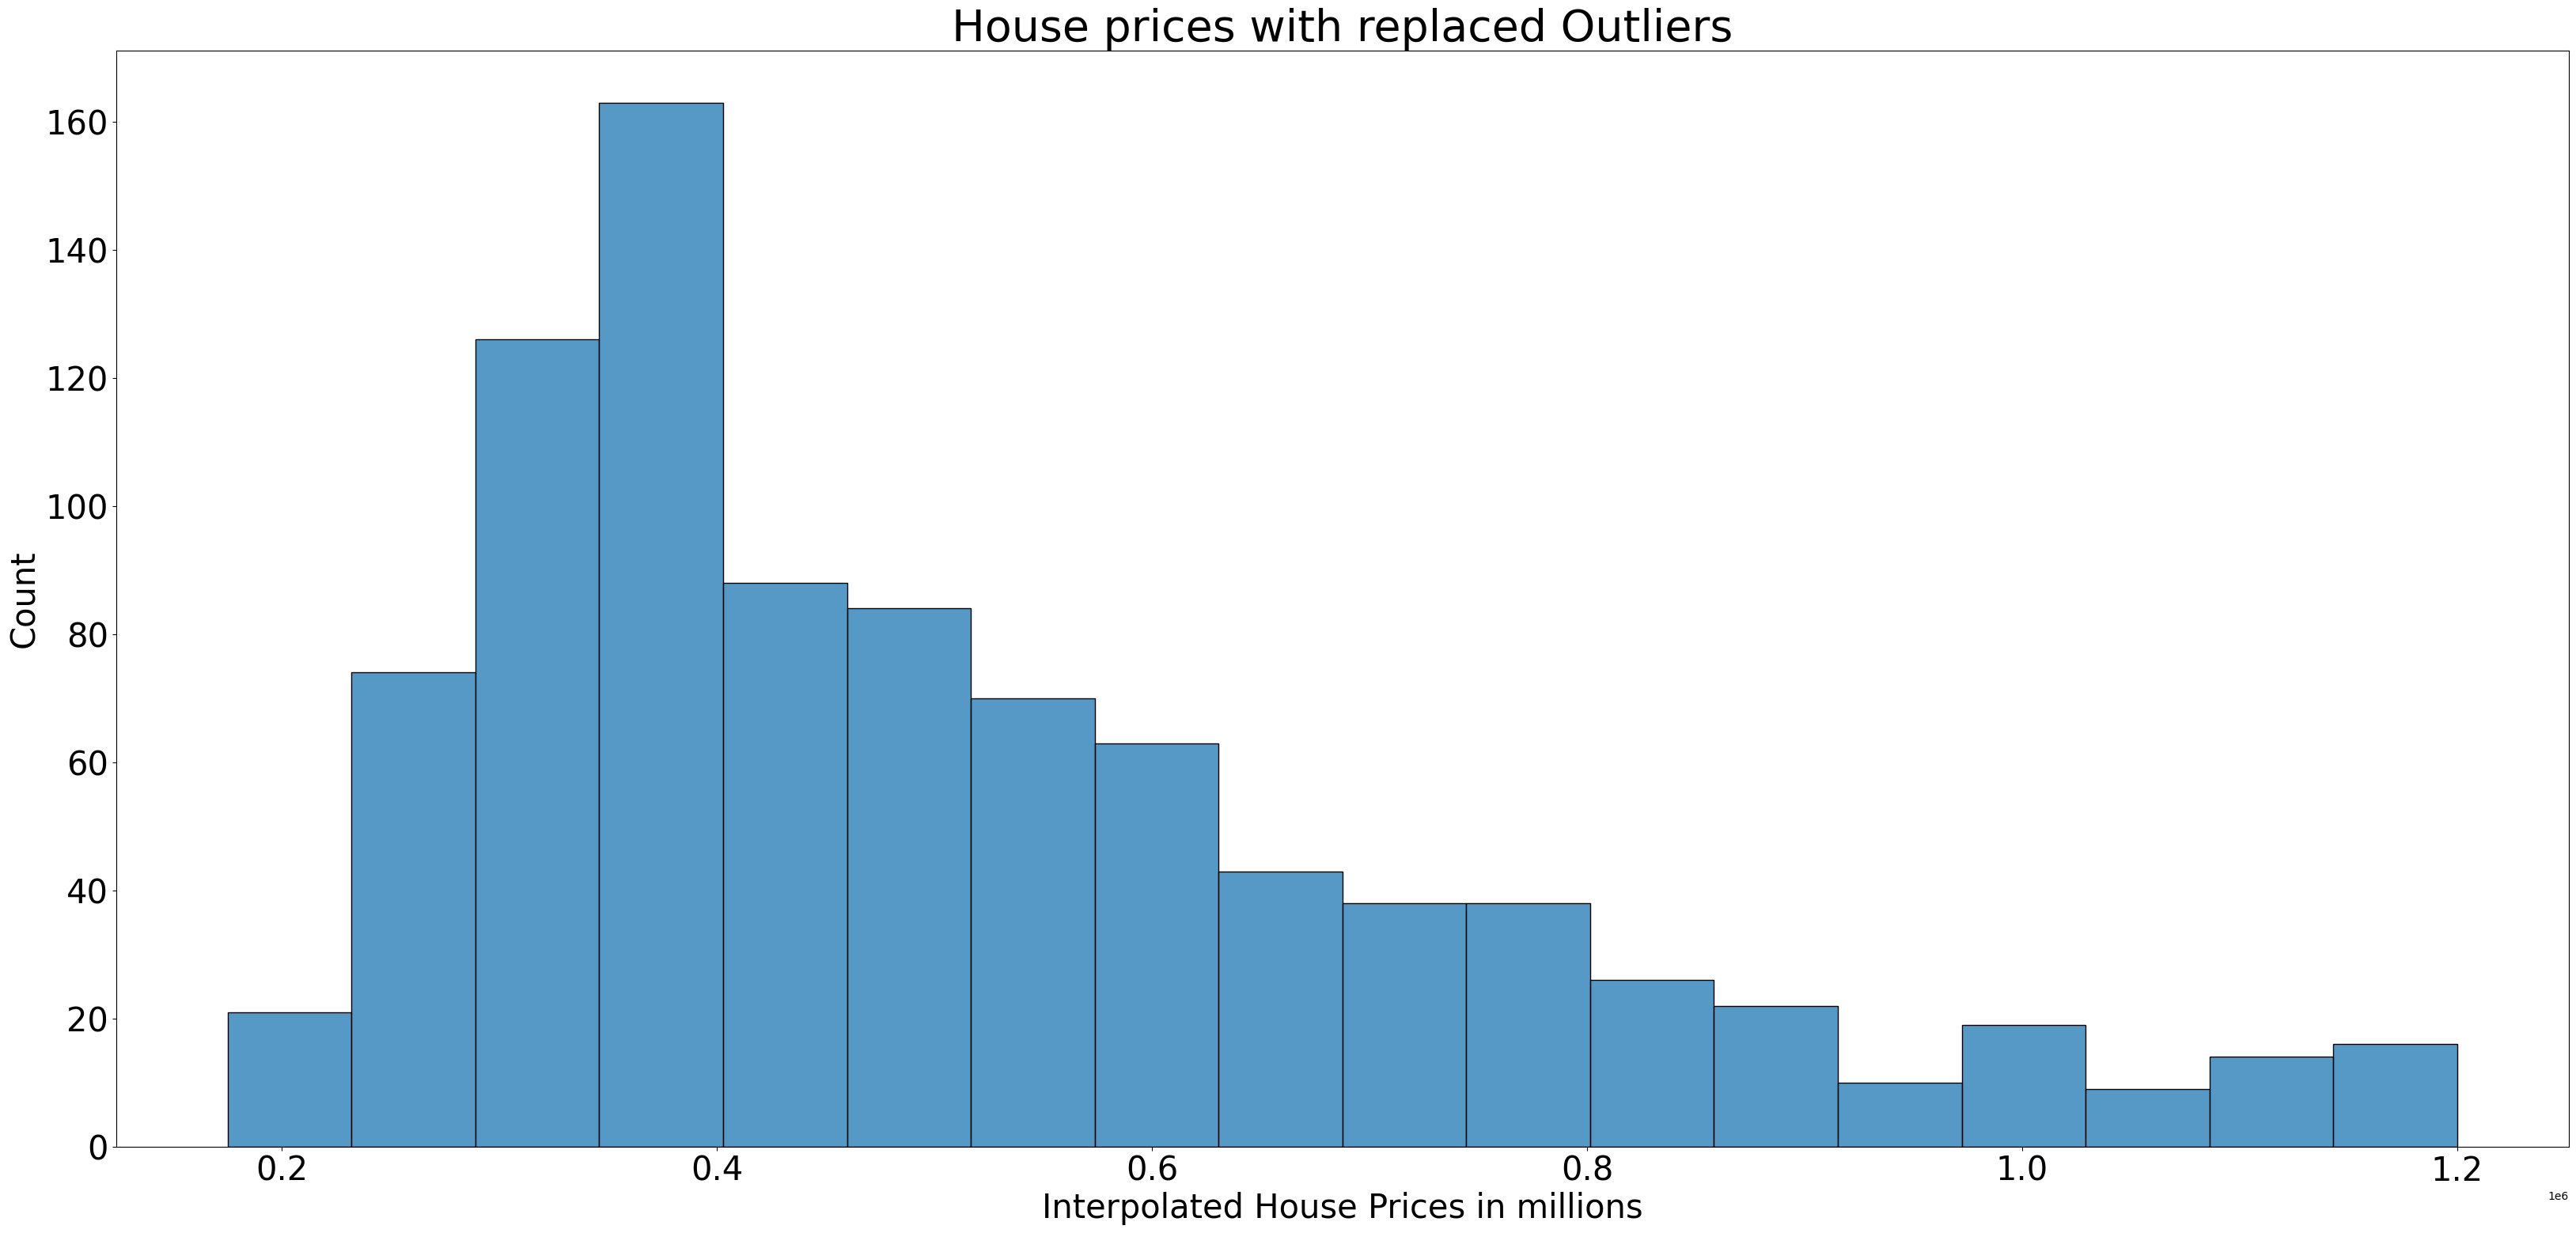

In [15]:
plt.figure(figsize = (40,18))

ax = sns.histplot(data= houseprice_replaced_data, x= 'Price_with_nan')
ax.set_xlabel('Interpolated House Prices in millions', fontsize = 30)
ax.set_title('House prices with replaced Outliers', fontsize = 40)
ax.set_ylabel('Count',  fontsize = 30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)